## Notebook Objective:
- Dataset: RVL-CDIP: 60 train and 100 test images in each 16 folder
- This notebook contains basic understanding of RVL-CDIP datset for image document classification task
- id 2 label and label2 id creation
- Ground Truth and gt_parse dictionary creation
- Removal of image path and create column for raw Pillow image
- Convert whole dataframe into huggingface dataset format

In [2]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Building our own dataset structure

In [10]:
import numpy as np
import pandas as pd
import os
import json
from PIL import Image
from datasets import load_dataset, Dataset, DatasetDict

In [11]:
path_train = '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training'
path_valid = '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Valid'

In [12]:
os.listdir(path_train)    ## returns list

['resume',
 'handwritten',
 'memo',
 'scientific_report',
 'budget',
 'scientific_publication',
 'email',
 'presentation',
 'questionnaire',
 'specification',
 'invoice',
 'letter',
 'file_folder',
 'form',
 'news_article',
 'advertisement']

In [14]:
len(os.listdir(path_train))     # total number of sub directories present in train dir

16

In [15]:
len(os.listdir(path_valid))

16

In [16]:
## make it in list
label_train = sorted([label for label in os.listdir(path_train)])
label_train

['advertisement',
 'budget',
 'email',
 'file_folder',
 'form',
 'handwritten',
 'invoice',
 'letter',
 'memo',
 'news_article',
 'presentation',
 'questionnaire',
 'resume',
 'scientific_publication',
 'scientific_report',
 'specification']

In [17]:
label_valid = sorted([label for label in os.listdir(path_valid)])
label_valid

['advertisement',
 'budget',
 'email',
 'file_folder',
 'form',
 'handwritten',
 'invoice',
 'letter',
 'memo',
 'news_article',
 'presentation',
 'questionnaire',
 'resume',
 'scientific_publication',
 'scientific_report',
 'specification']

In [18]:
for i in enumerate(label_train):     ## it will return tuple contain index and value
  print(i)

(0, 'advertisement')
(1, 'budget')
(2, 'email')
(3, 'file_folder')
(4, 'form')
(5, 'handwritten')
(6, 'invoice')
(7, 'letter')
(8, 'memo')
(9, 'news_article')
(10, 'presentation')
(11, 'questionnaire')
(12, 'resume')
(13, 'scientific_publication')
(14, 'scientific_report')
(15, 'specification')


In [19]:
for i in enumerate(label_valid):
  print(i)

(0, 'advertisement')
(1, 'budget')
(2, 'email')
(3, 'file_folder')
(4, 'form')
(5, 'handwritten')
(6, 'invoice')
(7, 'letter')
(8, 'memo')
(9, 'news_article')
(10, 'presentation')
(11, 'questionnaire')
(12, 'resume')
(13, 'scientific_publication')
(14, 'scientific_report')
(15, 'specification')


In [20]:
for v,k in enumerate(label_train):
  print(v,'||',k)

0 || advertisement
1 || budget
2 || email
3 || file_folder
4 || form
5 || handwritten
6 || invoice
7 || letter
8 || memo
9 || news_article
10 || presentation
11 || questionnaire
12 || resume
13 || scientific_publication
14 || scientific_report
15 || specification


In [21]:
for v,k in enumerate(label_valid):
  print(v,'||',k)

0 || advertisement
1 || budget
2 || email
3 || file_folder
4 || form
5 || handwritten
6 || invoice
7 || letter
8 || memo
9 || news_article
10 || presentation
11 || questionnaire
12 || resume
13 || scientific_publication
14 || scientific_report
15 || specification


In [22]:
label_train == label_valid

True

In [23]:
id2label_trn = {v: k for v,k in enumerate(label_train)}
id2label_trn

{0: 'advertisement',
 1: 'budget',
 2: 'email',
 3: 'file_folder',
 4: 'form',
 5: 'handwritten',
 6: 'invoice',
 7: 'letter',
 8: 'memo',
 9: 'news_article',
 10: 'presentation',
 11: 'questionnaire',
 12: 'resume',
 13: 'scientific_publication',
 14: 'scientific_report',
 15: 'specification'}

In [24]:
type(id2label_trn[0])

str

In [25]:
id2label_trn.items()

dict_items([(0, 'advertisement'), (1, 'budget'), (2, 'email'), (3, 'file_folder'), (4, 'form'), (5, 'handwritten'), (6, 'invoice'), (7, 'letter'), (8, 'memo'), (9, 'news_article'), (10, 'presentation'), (11, 'questionnaire'), (12, 'resume'), (13, 'scientific_publication'), (14, 'scientific_report'), (15, 'specification')])

In [26]:
for id, val in id2label_trn.items():
  print(id)
  print(val)

0
advertisement
1
budget
2
email
3
file_folder
4
form
5
handwritten
6
invoice
7
letter
8
memo
9
news_article
10
presentation
11
questionnaire
12
resume
13
scientific_publication
14
scientific_report
15
specification


In [27]:
id2label_vld = {v: k for v,k in enumerate(label_valid)}
id2label_vld

{0: 'advertisement',
 1: 'budget',
 2: 'email',
 3: 'file_folder',
 4: 'form',
 5: 'handwritten',
 6: 'invoice',
 7: 'letter',
 8: 'memo',
 9: 'news_article',
 10: 'presentation',
 11: 'questionnaire',
 12: 'resume',
 13: 'scientific_publication',
 14: 'scientific_report',
 15: 'specification'}

In [28]:
id2label_trn == id2label_vld

True

In [29]:
label2id_trn = {k: v for v,k in enumerate(label_train)}
label2id_trn

{'advertisement': 0,
 'budget': 1,
 'email': 2,
 'file_folder': 3,
 'form': 4,
 'handwritten': 5,
 'invoice': 6,
 'letter': 7,
 'memo': 8,
 'news_article': 9,
 'presentation': 10,
 'questionnaire': 11,
 'resume': 12,
 'scientific_publication': 13,
 'scientific_report': 14,
 'specification': 15}

In [30]:
label2id_trn.keys()

dict_keys(['advertisement', 'budget', 'email', 'file_folder', 'form', 'handwritten', 'invoice', 'letter', 'memo', 'news_article', 'presentation', 'questionnaire', 'resume', 'scientific_publication', 'scientific_report', 'specification'])

In [31]:
if 'advertisement' in label2id_trn.keys():
  print('True')

True


In [32]:
label2id_trn.get('memo')

8

In [33]:
path_train

'/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training'

In [34]:
for root, dir_names, files_name in os.walk(path_train):
  print(len(files_name))

0
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600
600


In [35]:
for root, dir_names, files_name in os.walk(path_valid):
  print(len(files_name))

0
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [36]:
## Method 1 using label2id   (less time complexity)
imgpath_list = []
img_labels_list = []
img_id_list = []

for root, dir_names, files_name in os.walk(path_train):

  if root == path_train:
    continue
  # print(root, '|||', os.path.basename(root), type(os.path.basename(root)))
  extracted = os.path.basename(root)
  # print(extracted)
  # print(dir_names)
  # print(files_name)
  for f in files_name:
    # print(f)
    img_rel_path = os.path.join(root, f)
    # print(img_rel_path)
    imgpath_list.append(img_rel_path)
    img_labels_list.append(extracted)
    if extracted in label2id_trn.keys():
      img_id_list.append(label2id_trn.get(extracted))
print(imgpath_list)
print(len(imgpath_list))
print('**************************************************')
print(img_labels_list)
print(len(img_labels_list))
print('**************************************************')
print(img_id_list)
print(len(img_id_list))

['/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50232682-2685.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/0000000869.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50591520-1521.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50412137-2147.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/2048560477.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50261583-1583.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50711887-1888.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50398148-8149.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50206884-6886.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/2043709946.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/11327053_11327054.tif', '/content/drive/MyDrive/Datasets/RVL

In [37]:
ids = []
vals = []
for id, val in id2label_trn.items():
  # print(id)
  ids.append(id)
  # print(val)
  vals.append(val)

print(ids)
print(vals)
vals.index('file_folder')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
['advertisement', 'budget', 'email', 'file_folder', 'form', 'handwritten', 'invoice', 'letter', 'memo', 'news_article', 'presentation', 'questionnaire', 'resume', 'scientific_publication', 'scientific_report', 'specification']


3

In [38]:
## Method 2 using id2label
imgpath_list = []
img_labels_list = []
img_id_list = []

for root, dir_names, files_name in os.walk(path_train):

  if root == path_train:
    continue
  # print(root, '|||', os.path.basename(root), type(os.path.basename(root)))
  extracted = os.path.basename(root)
  # print(extracted)
  # print(dir_names)
  # print(files_name)
  for f in files_name:
    # print(f)
    img_rel_path = os.path.join(root, f)
    # print(img_rel_path)
    imgpath_list.append(img_rel_path)
    img_labels_list.append(extracted)
    if extracted in vals:
      img_id_list.append(vals.index(extracted))
print(imgpath_list)
print(len(imgpath_list))
print('**************************************************')
print(img_labels_list)
print(len(img_labels_list))
print('**************************************************')
print(img_id_list)
print(len(img_id_list))

['/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50232682-2685.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/0000000869.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50591520-1521.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50412137-2147.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/2048560477.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50261583-1583.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50711887-1888.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50398148-8149.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/50206884-6886.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/2043709946.tif', '/content/drive/MyDrive/Datasets/RVL_CDIP_M_600_100/Training/resume/11327053_11327054.tif', '/content/drive/MyDrive/Datasets/RVL

## Create dataframe which will contain image path, label and id

In [39]:
## using label2ids
def dataProcessing(data_folder_path):

  # Creating sorted label list to maintain parity
  labels_list = sorted([label for label in os.listdir(data_folder_path)])

  # label to id dictionary format
  label2id_dict = {k: v for v,k in enumerate(labels_list)}     # v is label / class name  k is id i.e. 0,1,2...

  # Initialize empty lists for storing image paths , labels, and ids
  images_path_list = []
  images_labels_list = []
  images_ids_list = []

  # Iterate throgh all directories and subdirectories and returns list of all the names and path accordingly
  for root, dir_names, files_name in os.walk(data_folder_path):

    ## if base dir is same as root dir then it will continue else not also it will
    if root == data_folder_path:
      continue

    # Extract the label name from the subdirectory path
    label_extracted = os.path.basename(root)

    # Iterate through all the image files in the subdirectory
    for f in files_name:

      # Construct the relative path to the image file
      image_rel_path = os.path.join(root, f)

      # Add the relative image path and label to their respective lists
      images_path_list.append(image_rel_path)
      images_labels_list.append(label_extracted)
      # Add respective ids
      if label_extracted in label2id_dict.keys():
        images_ids_list.append(label2id_dict.get(label_extracted))
  print(len(images_path_list), len(images_labels_list), len(images_ids_list))

  ## Create a Pandas DataFrame
  df = pd.DataFrame({'Full_Image_Path': images_path_list, 'Image_Label': images_labels_list, 'Image_ids': images_ids_list})

  # Read dataframe as HuggingFace Dataset object
  dataset_hf = Dataset.from_pandas(df)

  return dataset_hf

In [40]:
hf_train_sub = dataProcessing(path_train)

hf_valid_sub = dataProcessing(path_valid)

9600 9600 9600
1600 1600 1600


In [41]:
hf_train_sub

Dataset({
    features: ['Full_Image_Path', 'Image_Label', 'Image_ids'],
    num_rows: 9600
})

In [42]:
hf_valid_sub

Dataset({
    features: ['Full_Image_Path', 'Image_Label', 'Image_ids'],
    num_rows: 1600
})

In [43]:
# Define a function to open and save images
def process_image(hfsample):
  image_path = hfsample['Full_Image_Path']
  image = Image.open(image_path)
  hfsample['Image_raw'] = image
  del hfsample['Full_Image_Path']
  return hfsample

In [44]:
# 1. For train
hf_train_sub_imgraw = hf_train_sub.map(process_image)

# 2. For valid
hf_valid_sub_imgraw = hf_valid_sub.map(process_image)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [45]:
hf_train_sub_imgraw

Dataset({
    features: ['Image_Label', 'Image_ids', 'Image_raw'],
    num_rows: 9600
})

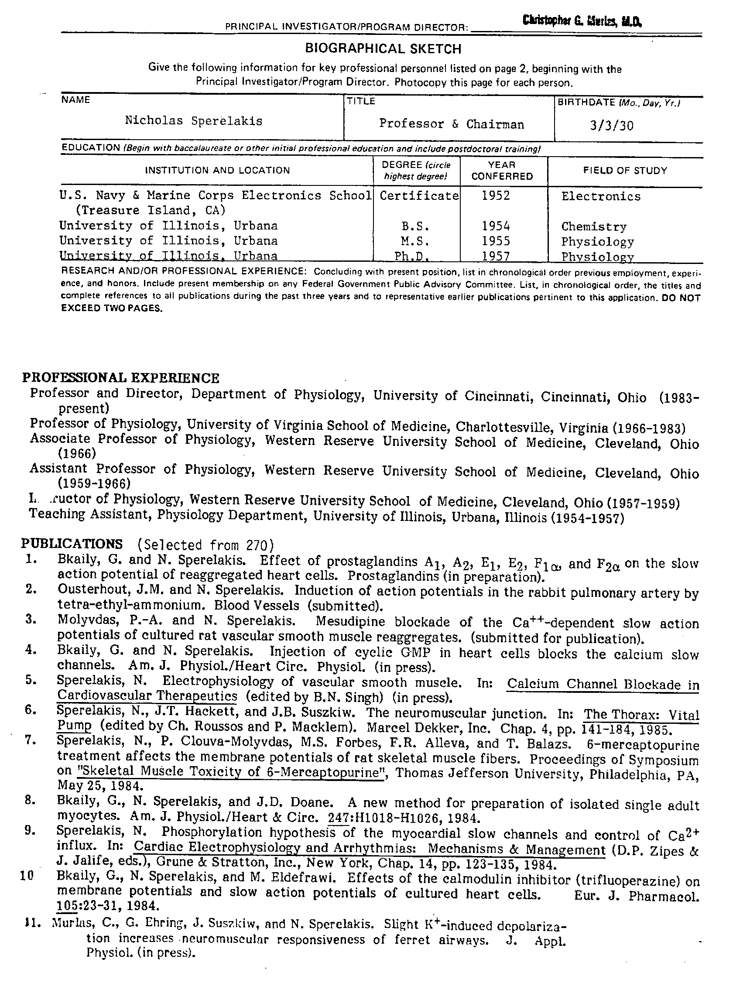

In [46]:
hf_train_sub_imgraw['Image_raw'][14]

In [47]:
hf_train_sub_imgraw['Image_ids'][14]

12

In [48]:
hf_train_sub_imgraw['Image_Label'][14]

'resume'

In [49]:
type(hf_train_sub_imgraw['Image_Label'][14])

str

In [50]:
hf_valid_sub_imgraw

Dataset({
    features: ['Image_Label', 'Image_ids', 'Image_raw'],
    num_rows: 1600
})

```
GT for Doc Classification Task:

'{"gt_parse": {"class" : "class_name"}}'

```

```
Sample helping code:

template = '{"gt_parse": {"class" : '

def add_ground_truth(hf_examples):

  ground_truths = []

  for label in hf_examples['label']:
    ground_truths.append(template + '"' + id2label[label] + '"' + "}}")

  hf_examples['ground_truth'] = ground_truths

  return hf_examples

## Mapping with the
hf_dataset_gt = hf_dataset.map(add_ground_truth, batched=True)

```


In [51]:
## Creating Custom function for ground truth

template = '{"gt_parse": {"class" : '
def add_ground_truth(hf_examples):

  ground_truths = template + '"' + hf_examples['Image_Label'] + '"' + "}}"

  hf_examples['ground_truth'] = ground_truths

  return hf_examples


In [52]:
## Mapping with the training and valid data
hf_train_sub_imgraw_gt = hf_train_sub_imgraw.map(add_ground_truth)

hf_valid_sub_imgraw_gt = hf_valid_sub_imgraw.map(add_ground_truth)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [53]:
hf_train_sub_imgraw_gt

Dataset({
    features: ['Image_Label', 'Image_ids', 'Image_raw', 'ground_truth'],
    num_rows: 9600
})

In [54]:
hf_train_sub_imgraw_gt.features

{'Image_Label': Value(dtype='string', id=None),
 'Image_ids': Value(dtype='int64', id=None),
 'Image_raw': Image(decode=True, id=None),
 'ground_truth': Value(dtype='string', id=None)}

In [55]:
hf_train_sub_imgraw_gt[7]

{'Image_Label': 'resume',
 'Image_ids': 12,
 'Image_raw': <PIL.TiffImagePlugin.TiffImageFile image mode=L size=754x1000>,
 'ground_truth': '{"gt_parse": {"class" : "resume"}}'}

In [56]:
hf_train_sub_imgraw_gt['ground_truth'][7]

'{"gt_parse": {"class" : "resume"}}'

In [57]:
# Let's verify we can read it as a Dict:
from ast import literal_eval

test = literal_eval(hf_train_sub_imgraw_gt['ground_truth'][7])
test['gt_parse']


{'class': 'resume'}

## Convert training and validation data into Dataset dict

In [58]:
processed_dataset_sub = DatasetDict(
    {
        "train" : hf_train_sub_imgraw_gt,
        "valid" : hf_valid_sub_imgraw_gt
    }
)

In [59]:
processed_dataset_sub

DatasetDict({
    train: Dataset({
        features: ['Image_Label', 'Image_ids', 'Image_raw', 'ground_truth'],
        num_rows: 9600
    })
    valid: Dataset({
        features: ['Image_Label', 'Image_ids', 'Image_raw', 'ground_truth'],
        num_rows: 1600
    })
})